In [1]:
from dilated_darts import dilated_darts_net

Using TensorFlow backend.


In [16]:
pooling_args = {
    'bilinear' : {
        'conv1x1' : 32
    },
    'encoding' : {
        'conv1x1' : 64,
        'K' : 16
    }
}

net = dilated_darts_net(47, (224, 224, 3), entry_conv=64,
                        dilation_rates=[1,2,3,4,5],
                        blocks = [48, 64, 96, 128],
                        strides=2, combine_mode='darts', 
                        pooling_args=pooling_args, dropout_rate=0.4)
net.summary()

[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]
0 48 [1, 2, 3, 4, 5]
1 64 [1, 2, 3, 4, 5]
2 96 [1, 2, 3, 4, 5]
3 128 [1, 2, 3, 4, 5]
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
entry_3x3_1 (Conv2D)            (None, 224, 224, 32) 896         input_4[0][0]                    
__________________________________________________________________________________________________
entry_3x3_2 (Conv2D)            (None, 224, 224, 64) 18496       entry_3x3_1[0][0]                
__________________________________________________________________________________________________
block_48_1x1_1 (Conv2D)         (None, 112, 112, 48) 3

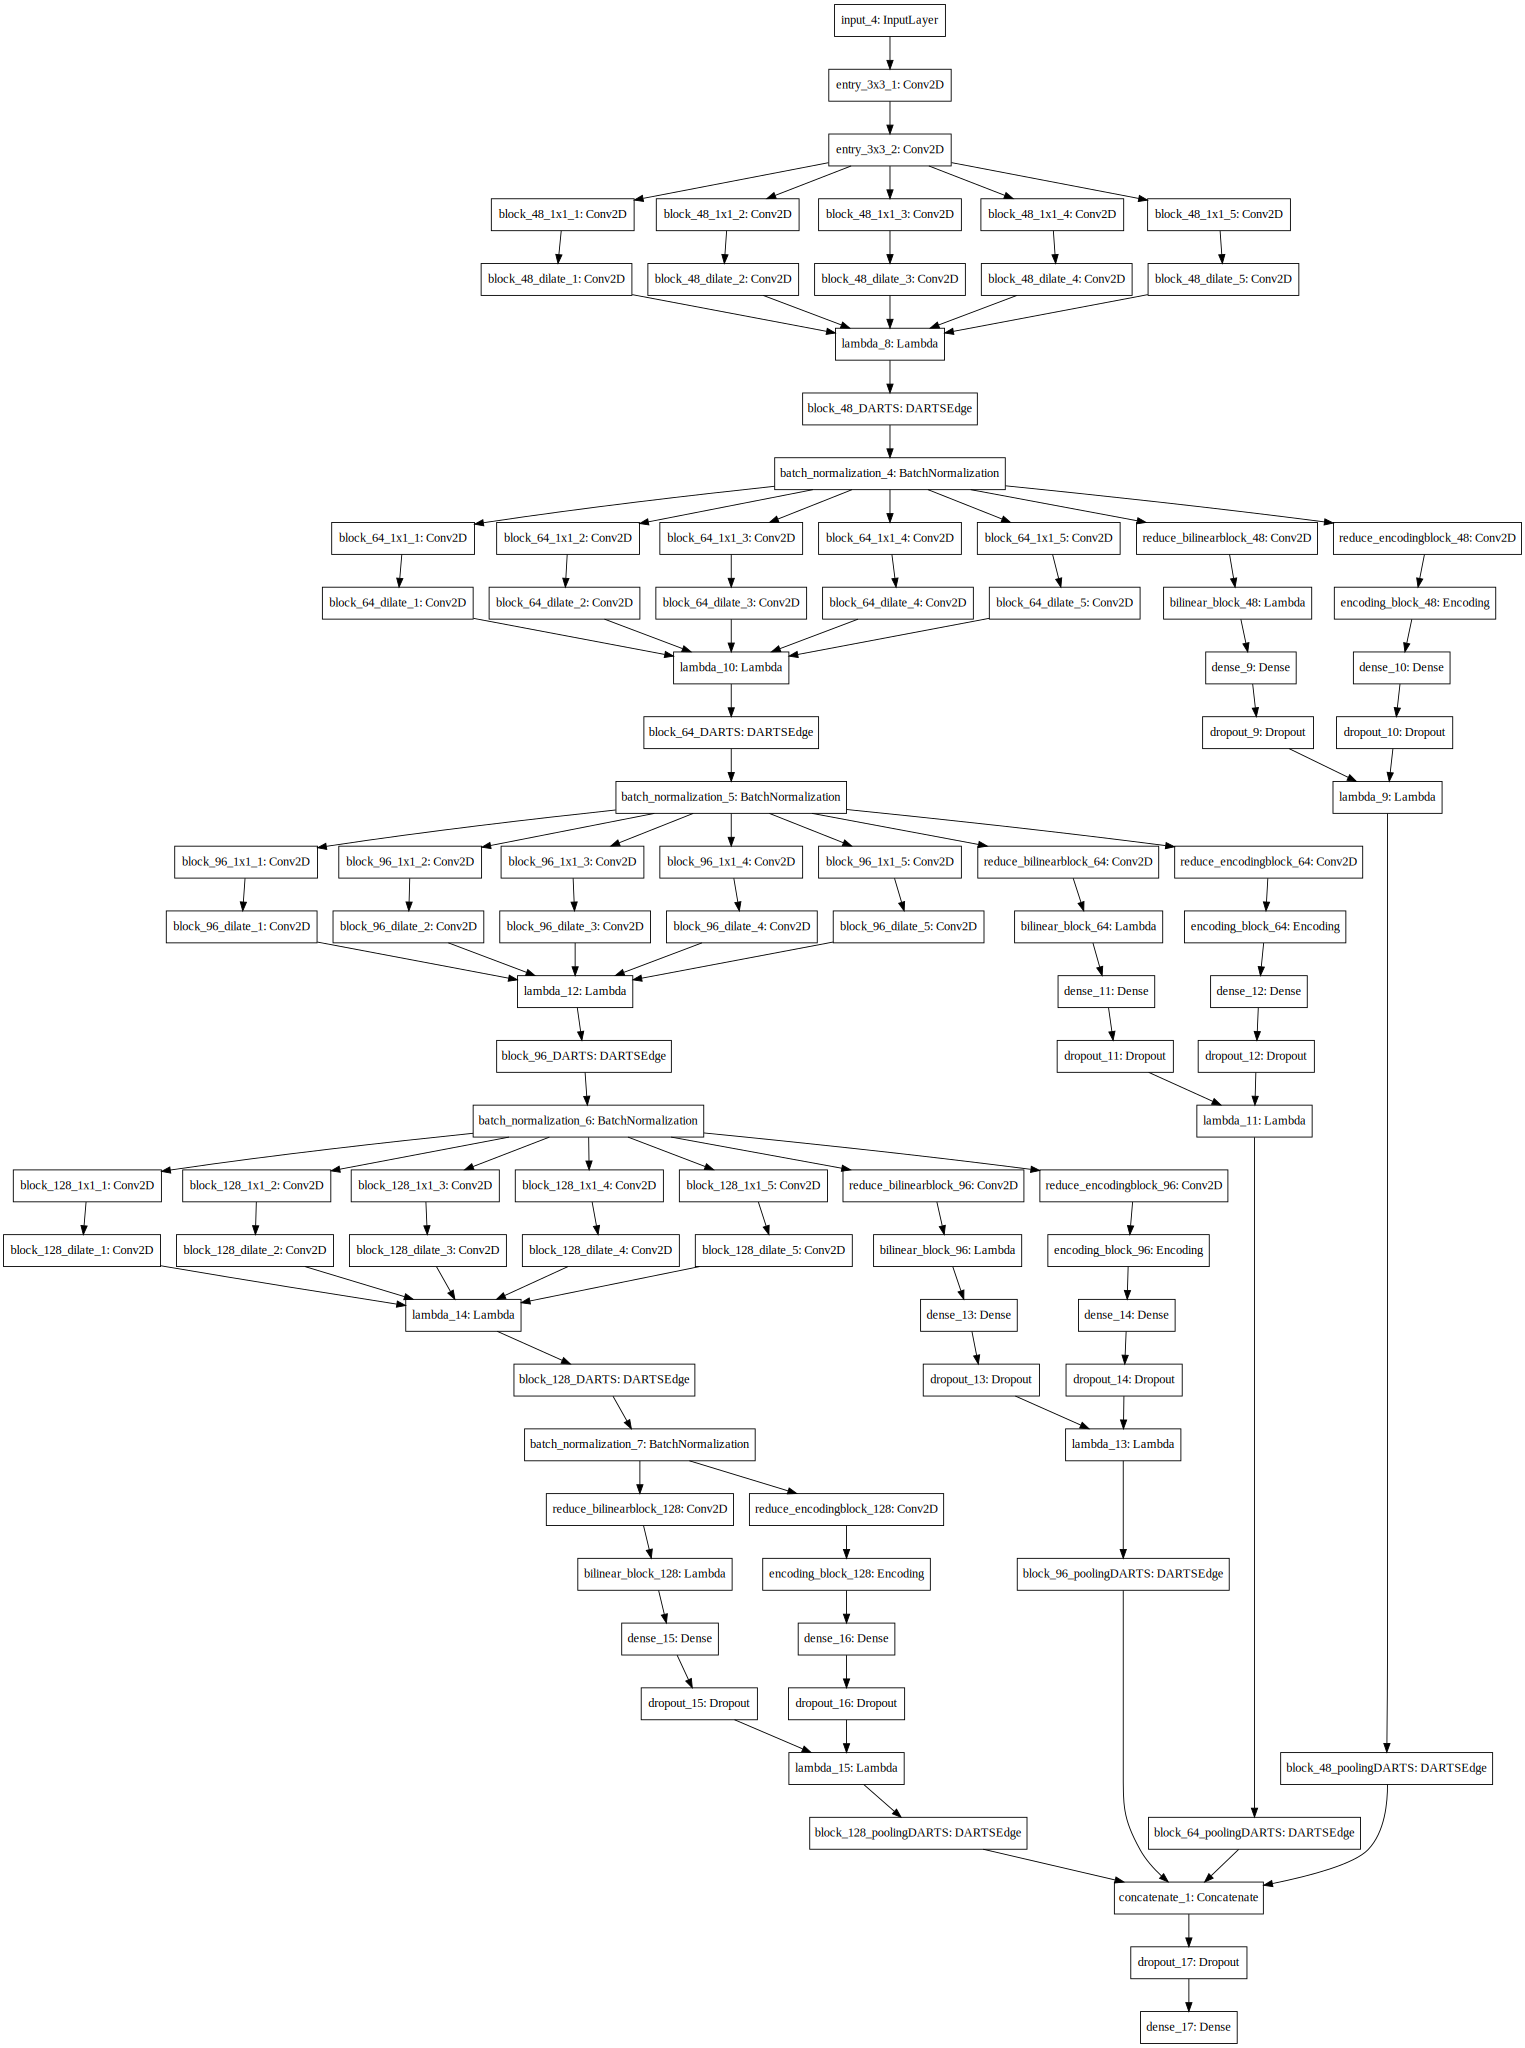

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(net).create(prog='dot', format='svg'))

In [4]:
from texture.layers import Encoding
e = Encoding(K=32, name='some_name')

In [5]:
#from util import make_pooling_layer, auxiliary_pooling

In [6]:
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K

x = Input((128,128,64))
print(x.shape)

e(x)

(?, 128, 128, 64)


<tf.Tensor 'some_name/flatten/Reshape:0' shape=(?, 2048) dtype=float32>

In [7]:
codes = Input((1, 32, 64))
codes.shape

TensorShape([Dimension(None), Dimension(1), Dimension(32), Dimension(64)])

In [8]:
x = K.expand_dims(x, axis=-2)
x.shape

TensorShape([Dimension(None), Dimension(128), Dimension(128), Dimension(1), Dimension(64)])

In [9]:
output = x - codes
output.shape

TensorShape([Dimension(None), Dimension(128), Dimension(128), Dimension(32), Dimension(64)])

In [10]:
import numpy as np

In [11]:
x = np.random.randint(0, 10, size=(1, 12, 1, 4))
c = np.random.randint(0, 10, size=(1, 1, 8, 4))

In [12]:
x, c

(array([[[[3, 1, 1, 6]],
 
         [[9, 4, 5, 0]],
 
         [[6, 6, 8, 7]],
 
         [[1, 2, 3, 2]],
 
         [[5, 5, 3, 1]],
 
         [[5, 7, 0, 7]],
 
         [[4, 0, 2, 0]],
 
         [[8, 8, 3, 2]],
 
         [[9, 8, 3, 8]],
 
         [[5, 0, 2, 2]],
 
         [[1, 4, 0, 5]],
 
         [[8, 3, 7, 3]]]]), array([[[[1, 8, 6, 2],
          [1, 4, 1, 9],
          [6, 3, 5, 6],
          [0, 1, 7, 7],
          [2, 5, 7, 7],
          [4, 6, 4, 8],
          [7, 8, 8, 9],
          [5, 2, 8, 3]]]]))

In [13]:
x - c

array([[[[ 2, -7, -5,  4],
         [ 2, -3,  0, -3],
         [-3, -2, -4,  0],
         [ 3,  0, -6, -1],
         [ 1, -4, -6, -1],
         [-1, -5, -3, -2],
         [-4, -7, -7, -3],
         [-2, -1, -7,  3]],

        [[ 8, -4, -1, -2],
         [ 8,  0,  4, -9],
         [ 3,  1,  0, -6],
         [ 9,  3, -2, -7],
         [ 7, -1, -2, -7],
         [ 5, -2,  1, -8],
         [ 2, -4, -3, -9],
         [ 4,  2, -3, -3]],

        [[ 5, -2,  2,  5],
         [ 5,  2,  7, -2],
         [ 0,  3,  3,  1],
         [ 6,  5,  1,  0],
         [ 4,  1,  1,  0],
         [ 2,  0,  4, -1],
         [-1, -2,  0, -2],
         [ 1,  4,  0,  4]],

        [[ 0, -6, -3,  0],
         [ 0, -2,  2, -7],
         [-5, -1, -2, -4],
         [ 1,  1, -4, -5],
         [-1, -3, -4, -5],
         [-3, -4, -1, -6],
         [-6, -6, -5, -7],
         [-4,  0, -5, -1]],

        [[ 4, -3, -3, -1],
         [ 4,  1,  2, -8],
         [-1,  2, -2, -5],
         [ 5,  4, -4, -6],
         [ 3,  0, -4

In [14]:
x[0, 6, 0, :] - c[0, 0, 4, :]

array([ 2, -5, -5, -7])

In [15]:
(x-c)[0, 6, 4, :]

array([ 2, -5, -5, -7])